# points to remember
- all the input features must be independent of each other, if in case they shows dependency we will fall into the trap of multicollinearity.
- Atleast one of the input feature must have some sort of dependency with the target feature.
- In the case of Logistic regression my input features should follow gaussian distribution|

In [48]:
import seaborn as sns
import pandas as pd
from numpy.ma.core import ravel

df=pd.DataFrame(sns.load_dataset('Penguins'))
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


## Binary
## Multinomial
## Ordinal

In [49]:
df.species.value_counts()

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

In [50]:

# data cleaning.

# handling missing values

In [51]:
num_cols=df.select_dtypes(include=["float64"])
cat_cols=df.select_dtypes(include=["object"])

In [52]:
cat_cols

,species,island,sex
0,Adelie,Torgersen,MALE
1,Adelie,Torgersen,FEMALE
2,Adelie,Torgersen,FEMALE
3,Adelie,Torgersen,NaN
4,Adelie,Torgersen,FEMALE
...,...,...,...
339,Gentoo,Biscoe,NaN
340,Gentoo,Biscoe,FEMALE
341,Gentoo,Biscoe,MALE
342,Gentoo,Biscoe,FEMALE


In [53]:
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [54]:
# treating null values

In [55]:
for col in num_cols:
    df[col]=df[col].fillna(df[col].median())




In [56]:

for col in cat_cols:
    df[col]=df[col].fillna(df[col].mode()[0])

In [57]:
df.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [58]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,344.000000,344.000000,344.000000,344.000000
mean,43.925000,17.152035,200.892442,4200.872093
std,5.443792,1.969060,14.023826,799.696532
min,32.100000,13.100000,172.000000,2700.000000
25%,39.275000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [59]:
import numpy as np
def cap_outliers(col):
   Q1=df[col].quantile(0.25)
   Q3=df[col].quantile(0.75)
   IQR=Q3-Q1
   lower=Q1-1.5*IQR
   upper=Q3+1.5*IQR

   df[col]=np.where(df[col]<lower,lower,np.where(df[col]>upper,upper,df[col]))


for col in num_cols:
    cap_outliers(col)

In [60]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,344.000000,344.000000,344.000000,344.000000
mean,43.925000,17.152035,200.892442,4200.872093
std,5.443792,1.969060,14.023826,799.696532
min,32.100000,13.100000,172.000000,2700.000000
25%,39.275000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


<Axes: ylabel='Density'>

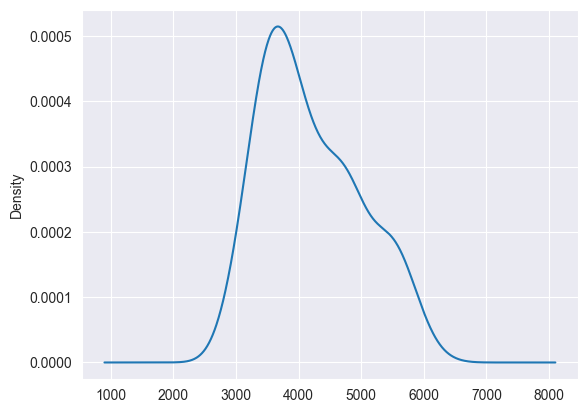

In [61]:
df["body_mass_g"].plot(kind="kde")

In [62]:
x=df.iloc[:,1:]
y=df.iloc[:,:1]
x

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Torgersen,39.10,18.7,181.0,3750.0,MALE
1,Torgersen,39.50,17.4,186.0,3800.0,FEMALE
2,Torgersen,40.30,18.0,195.0,3250.0,FEMALE
3,Torgersen,44.45,17.3,197.0,4050.0,MALE
4,Torgersen,36.70,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...
339,Biscoe,44.45,17.3,197.0,4050.0,MALE
340,Biscoe,46.80,14.3,215.0,4850.0,FEMALE
341,Biscoe,50.40,15.7,222.0,5750.0,MALE
342,Biscoe,45.20,14.8,212.0,5200.0,FEMALE


# seperating the input and output and test and train features

In [63]:
x.sex.value_counts()

sex
MALE      179
FEMALE    165
Name: count, dtype: int64

In [64]:
# feature scaling
from sklearn.preprocessing import OneHotEncoder
cat_cols=["island","sex"]
encoder=OneHotEncoder(drop='first',sparse_output=False)
cat_enc=encoder.fit_transform(x[["island","sex"]])
# converting it into dataframe
cat_df=pd.DataFrame(cat_enc,columns=encoder.get_feature_names_out(cat_cols))
cat_df

,island_Dream,island_Torgersen,sex_MALE
0,0.0,1.0,1.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,1.0
4,0.0,1.0,0.0
...,...,...,...
339,0.0,0.0,1.0
340,0.0,0.0,0.0
341,0.0,0.0,1.0
342,0.0,0.0,0.0


In [65]:
x.drop(columns=["island","sex"],axis=1,inplace=True)

In [66]:
x

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.10,18.7,181.0,3750.0
1,39.50,17.4,186.0,3800.0
2,40.30,18.0,195.0,3250.0
3,44.45,17.3,197.0,4050.0
4,36.70,19.3,193.0,3450.0
...,...,...,...,...
339,44.45,17.3,197.0,4050.0
340,46.80,14.3,215.0,4850.0
341,50.40,15.7,222.0,5750.0
342,45.20,14.8,212.0,5200.0


In [67]:
x=pd.concat([x,cat_df],axis=1)
x

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE
0,39.10,18.7,181.0,3750.0,0.0,1.0,1.0
1,39.50,17.4,186.0,3800.0,0.0,1.0,0.0
2,40.30,18.0,195.0,3250.0,0.0,1.0,0.0
3,44.45,17.3,197.0,4050.0,0.0,1.0,1.0
4,36.70,19.3,193.0,3450.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...
339,44.45,17.3,197.0,4050.0,0.0,0.0,1.0
340,46.80,14.3,215.0,4850.0,0.0,0.0,0.0
341,50.40,15.7,222.0,5750.0,0.0,0.0,1.0
342,45.20,14.8,212.0,5200.0,0.0,0.0,0.0


In [69]:
y

,species
0,Adelie
1,Adelie
2,Adelie
3,Adelie
4,Adelie
...,...
339,Gentoo
340,Gentoo
341,Gentoo
342,Gentoo


In [70]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=7)

In [72]:
# Standardizing the numerical features


In [73]:
num_cols

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
3,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0
...,...,...,...,...
339,NaN,NaN,NaN,NaN
340,46.8,14.3,215.0,4850.0
341,50.4,15.7,222.0,5750.0
342,45.2,14.8,212.0,5200.0


In [74]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train[num_cols.columns]=scaler.fit_transform(x_train[num_cols.columns])
x_train

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE
97,-0.697288,0.647996,-0.366138,0.201212,1.0,0.0,1.0
177,1.448213,0.894071,-0.293154,-0.054464,1.0,0.0,1.0
246,0.072892,-1.419029,1.093549,-0.118384,0.0,0.0,1.0
16,-0.990690,0.894071,-0.439122,-0.949333,0.0,1.0,0.0
204,0.292943,0.057417,-0.585091,-0.757576,1.0,0.0,0.0
...,...,...,...,...,...,...,...
211,0.274606,1.090930,-0.512107,-0.853454,1.0,0.0,0.0
67,-0.550587,0.943285,-0.950013,-0.118384,0.0,0.0,1.0
25,-1.614169,0.844856,-1.022997,-0.501899,0.0,0.0,0.0
196,1.246500,0.352707,-0.366138,-0.661697,1.0,0.0,0.0


In [75]:
x_test[num_cols.columns]=scaler.transform(x_test[num_cols.columns])
x_test

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE
173,0.806397,0.155847,-0.731060,-1.013252,1.0,0.0,1.0
30,-0.843989,-0.237872,-1.679856,-1.205010,1.0,0.0,0.0
115,-0.257185,0.549566,-0.366138,-0.150343,0.0,0.0,1.0
341,1.154812,-0.730021,1.531455,1.990950,0.0,0.0,1.0
141,-0.642275,0.008202,-1.022997,-0.917374,1.0,0.0,1.0
...,...,...,...,...,...,...,...
285,1.044786,-0.188657,2.115329,1.927030,0.0,0.0,1.0
104,-1.137391,0.697211,-0.585091,-1.620485,0.0,0.0,0.0
174,-0.165497,-0.287087,-1.022997,-1.652444,1.0,0.0,0.0
52,-1.669182,0.352707,-0.804044,-0.949333,0.0,0.0,0.0


In [84]:
# model Implementation

In [89]:
import numpy as np
y_train=np.ravel(y_train)

In [90]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [91]:
y_test=np.ravel(y_test)

In [94]:
y_test

array(['Chinstrap', 'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Adelie',
       'Gentoo', 'Gentoo', 'Chinstrap', 'Adelie', 'Adelie', 'Chinstrap',
       'Adelie', 'Chinstrap', 'Adelie', 'Gentoo', 'Gentoo', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Chinstrap', 'Gentoo',
       'Gentoo', 'Adelie', 'Gentoo', 'Chinstrap', 'Chinstrap',
       'Chinstrap', 'Adelie', 'Adelie', 'Gentoo', 'Gentoo', 'Gentoo',
       'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Chinstrap',
       'Gentoo', 'Gentoo', 'Adelie', 'Adelie', 'Chinstrap', 'Gentoo',
       'Gentoo', 'Adelie', 'Adelie', 'Chinstrap', 'Adelie', 'Chinstrap',
       'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Adelie',
       'Gentoo', 'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Gentoo',
       'Adelie', 'Gentoo', 'Adelie', 'Gentoo', 'Adelie', 'Chinstrap',
       'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Chinstrap', 'Adelie',
       'Gentoo', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Gentoo',
       'Adelie', 'Adelie', 'Ge

In [93]:
y_pred=lr.predict(x_test)
y_pred

array(['Chinstrap', 'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Adelie',
       'Gentoo', 'Gentoo', 'Chinstrap', 'Adelie', 'Adelie', 'Chinstrap',
       'Adelie', 'Chinstrap', 'Adelie', 'Gentoo', 'Gentoo', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Chinstrap', 'Gentoo',
       'Gentoo', 'Adelie', 'Gentoo', 'Chinstrap', 'Chinstrap',
       'Chinstrap', 'Adelie', 'Adelie', 'Gentoo', 'Gentoo', 'Gentoo',
       'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Chinstrap',
       'Gentoo', 'Gentoo', 'Adelie', 'Adelie', 'Chinstrap', 'Gentoo',
       'Gentoo', 'Adelie', 'Adelie', 'Chinstrap', 'Adelie', 'Chinstrap',
       'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Adelie',
       'Gentoo', 'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Gentoo',
       'Adelie', 'Gentoo', 'Adelie', 'Gentoo', 'Adelie', 'Chinstrap',
       'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Chinstrap', 'Adelie',
       'Gentoo', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Gentoo',
       'Adelie', 'Adelie', 'Ge

In [109]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

cm=confusion_matrix(y_test,y_pred)

In [97]:
accuracy_score(y_test,y_pred)

0.9903846153846154

In [98]:
labels=lr.classes_

In [99]:
labels

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [103]:
import matplotlib.pyplot as plt
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)


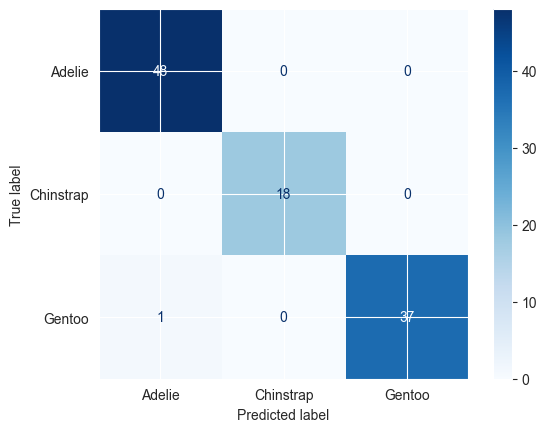

In [105]:
disp.plot(cmap='Blues')

<Axes: >

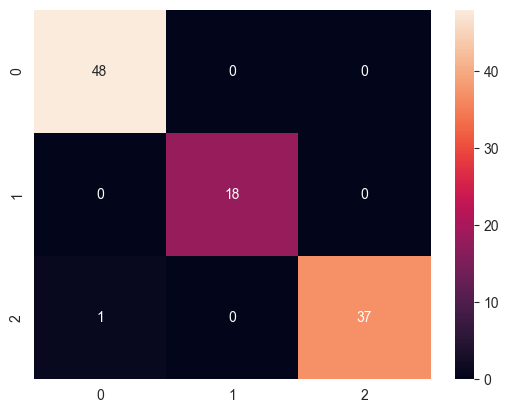

In [106]:
sns.heatmap(cm,annot=True,fmt='g')

In [110]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      Adelie       0.98      1.00      0.99        48
   Chinstrap       1.00      1.00      1.00        18
      Gentoo       1.00      0.97      0.99        38

    accuracy                           0.99       104
   macro avg       0.99      0.99      0.99       104
weighted avg       0.99      0.99      0.99       104

